<a href="https://colab.research.google.com/github/Ankushsb62/OASIS-INFOBYTE-DATA-SCIENCE/blob/PROJECT-2/Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('/content/Unemployment in India.csv')

# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Drop rows with missing values
data_cleaned = data.dropna()

In [3]:
# Convert 'Date' column to datetime type and extract month and year
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'].str.strip(), format='%d-%m-%Y')
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month

# One-hot encode categorical features: 'Region' and 'Area'
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(data_cleaned[['Region', 'Area']])
encoded_feature_names = encoder.get_feature_names_out(['Region', 'Area'])

<ipython-input-3-70013c0b49d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'].str.strip(), format='%d-%m-%Y')
<ipython-input-3-70013c0b49d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year'] = data_cleaned['Date'].dt.year
<ipython-input-3-70013c0b49d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [4]:
# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data_cleaned.index)

# Combine the original and encoded features
model_data = pd.concat([data_cleaned, encoded_df], axis=1)

In [5]:
# Select relevant features for the model
features = ['Year', 'Month', 'Estimated Employed', 'Estimated Labour Participation Rate (%)'] + list(encoded_feature_names)
X = model_data[features]
y = model_data['Estimated Unemployment Rate (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [6]:
print("Linear Regression - Mean Absolute Error (MAE):", mae)
print("Linear Regression - R-squared (R²):", r2)

Linear Regression - Mean Absolute Error (MAE): 5.435529033674053
Linear Regression - R-squared (R²): 0.4131941984976768


In [7]:
# Train a Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the test set
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate the Ridge regression model
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("Ridge Regression - Mean Absolute Error (MAE):", ridge_mae)
print("Ridge Regression - R-squared (R²):", ridge_r2)

Ridge Regression - Mean Absolute Error (MAE): 5.4658827785176385
Ridge Regression - R-squared (R²): 0.4130429365932018


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.08918e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Errors: 120     3.566691
430    -0.985526
334     1.613712
350     2.360329
426   -15.221538
         ...    
69     -0.577511
382    -5.228659
131   -17.767054
44      2.600055
70      4.305945
Name: Estimated Unemployment Rate (%), Length: 148, dtype: float64


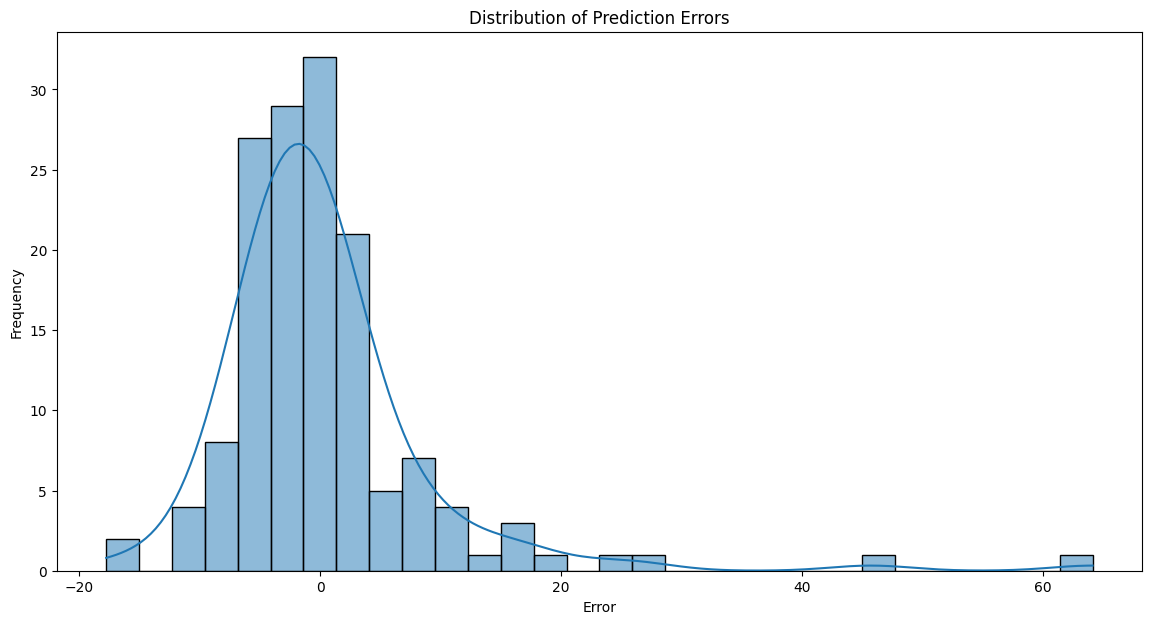

In [8]:
# Error analysis
errors = y_test - y_pred
print("Errors:", errors)

# Plot the distribution of errors
plt.figure(figsize=(14, 7))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

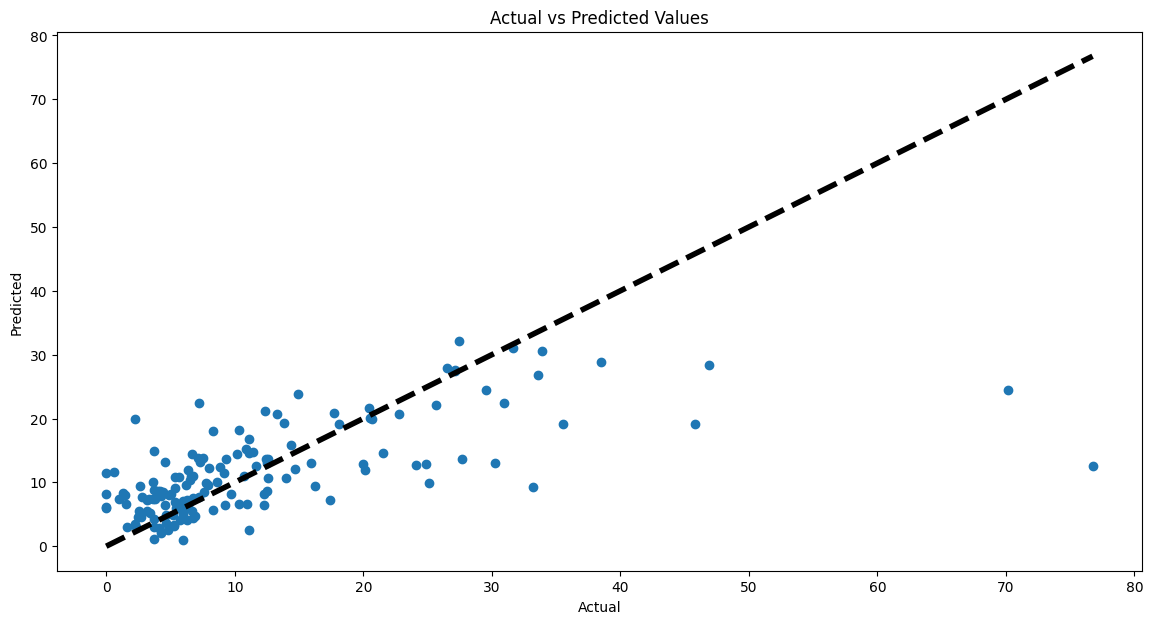

In [9]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [10]:
# Print model coefficients
coefficients = pd.DataFrame(model.coef_, index=features, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

                                          Coefficient
Region_Tripura                           1.560339e+01
Region_Haryana                           1.492550e+01
Region_Uttar Pradesh                     1.491849e+01
Region_Bihar                             1.441384e+01
Region_Jharkhand                         9.777299e+00
Year                                     7.645329e+00
Region_Himachal Pradesh                  7.566430e+00
Region_Chandigarh                        7.449347e+00
Region_Rajasthan                         6.737507e+00
Region_Jammu & Kashmir                   6.238113e+00
Region_Delhi                             6.036745e+00
Region_Maharashtra                       5.833484e+00
Region_West Bengal                       5.398240e+00
Region_Tamil Nadu                        4.676547e+00
Region_Punjab                            3.075634e+00
Region_Madhya Pradesh                    1.716928e+00
Month                                    5.345023e-01
Region_Gujarat              

<Figure size 1400x1200 with 0 Axes>

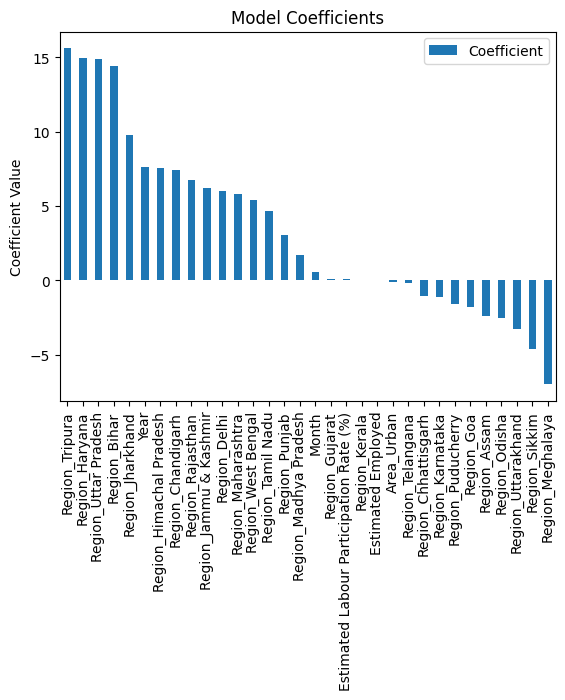

In [11]:
# Plot the coefficients
plt.figure(figsize=(14, 12))
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar')
plt.title('Model Coefficients')
plt.ylabel('Coefficient Value')
plt.show()

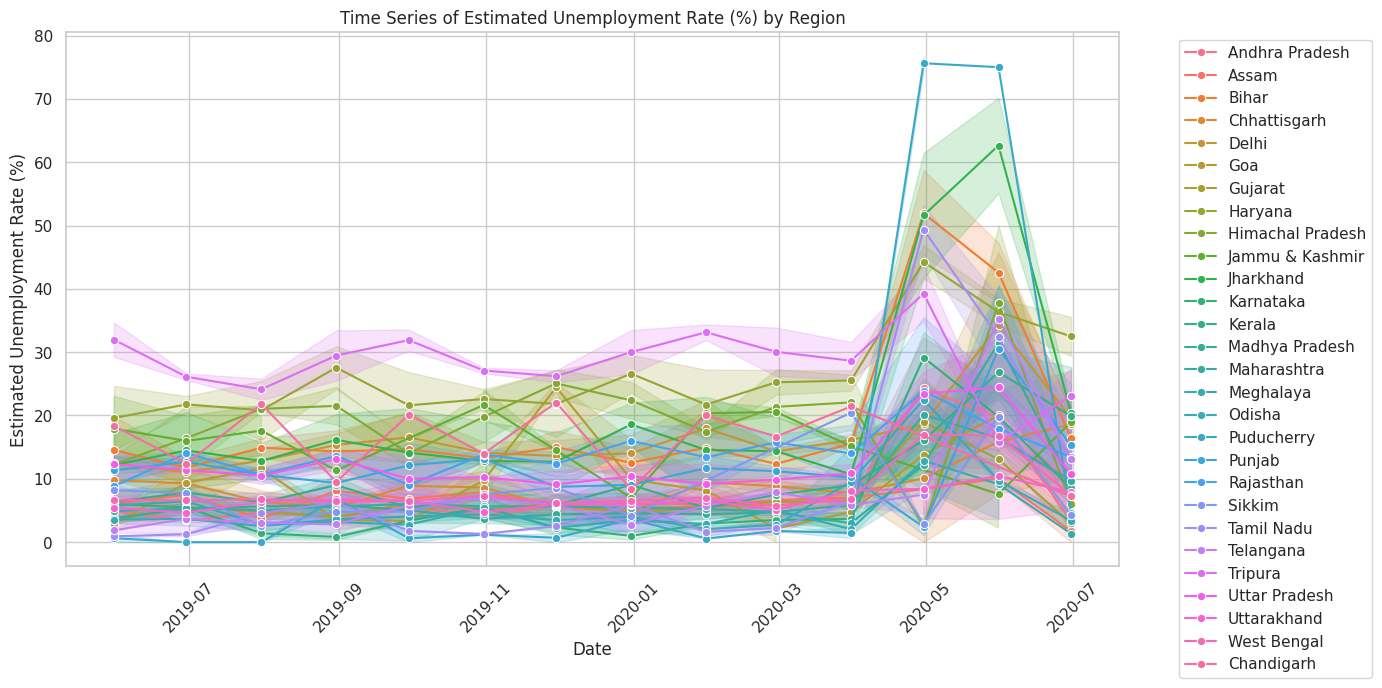

In [12]:
# Set the style for the plots
sns.set(style='whitegrid')

# Time series plot of the unemployment rate
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_cleaned, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker='o')
plt.title('Time Series of Estimated Unemployment Rate (%) by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


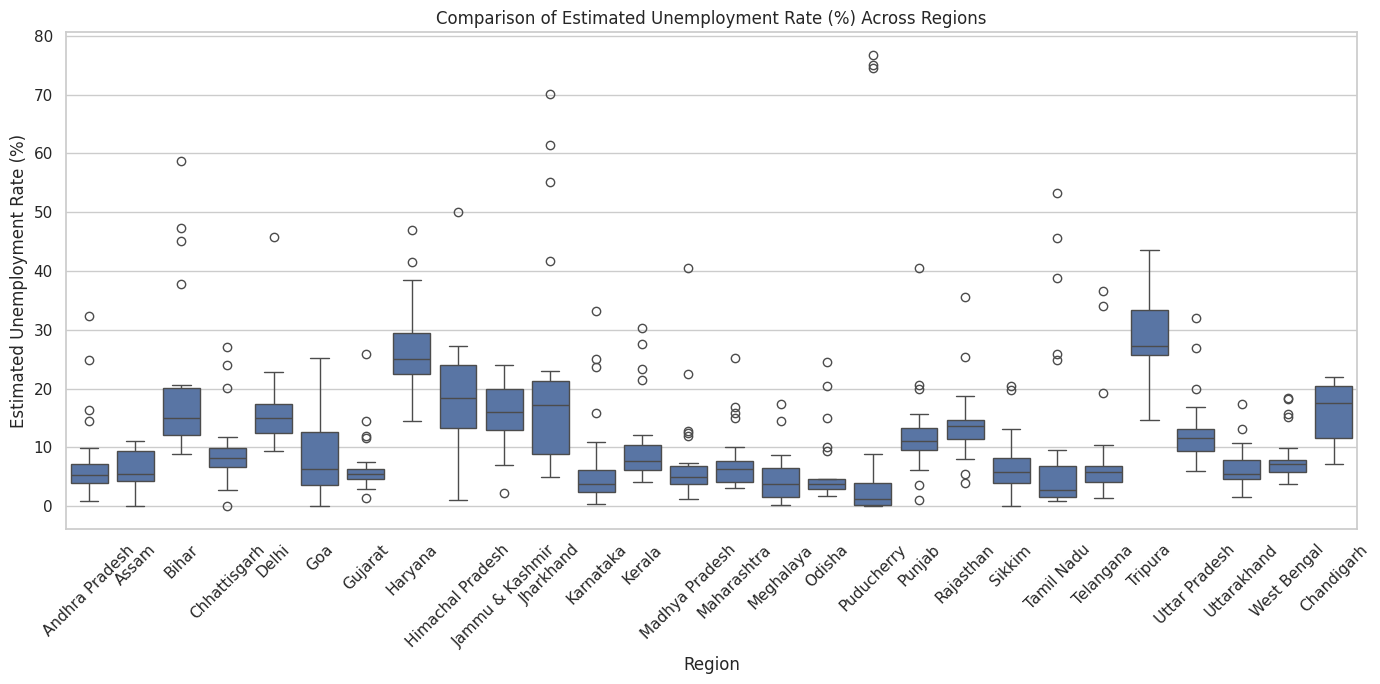

In [13]:
# Comparison of the unemployment rate across different regions
plt.figure(figsize=(14, 7))
sns.boxplot(data=data_cleaned, x='Region', y='Estimated Unemployment Rate (%)')
plt.title('Comparison of Estimated Unemployment Rate (%) Across Regions')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

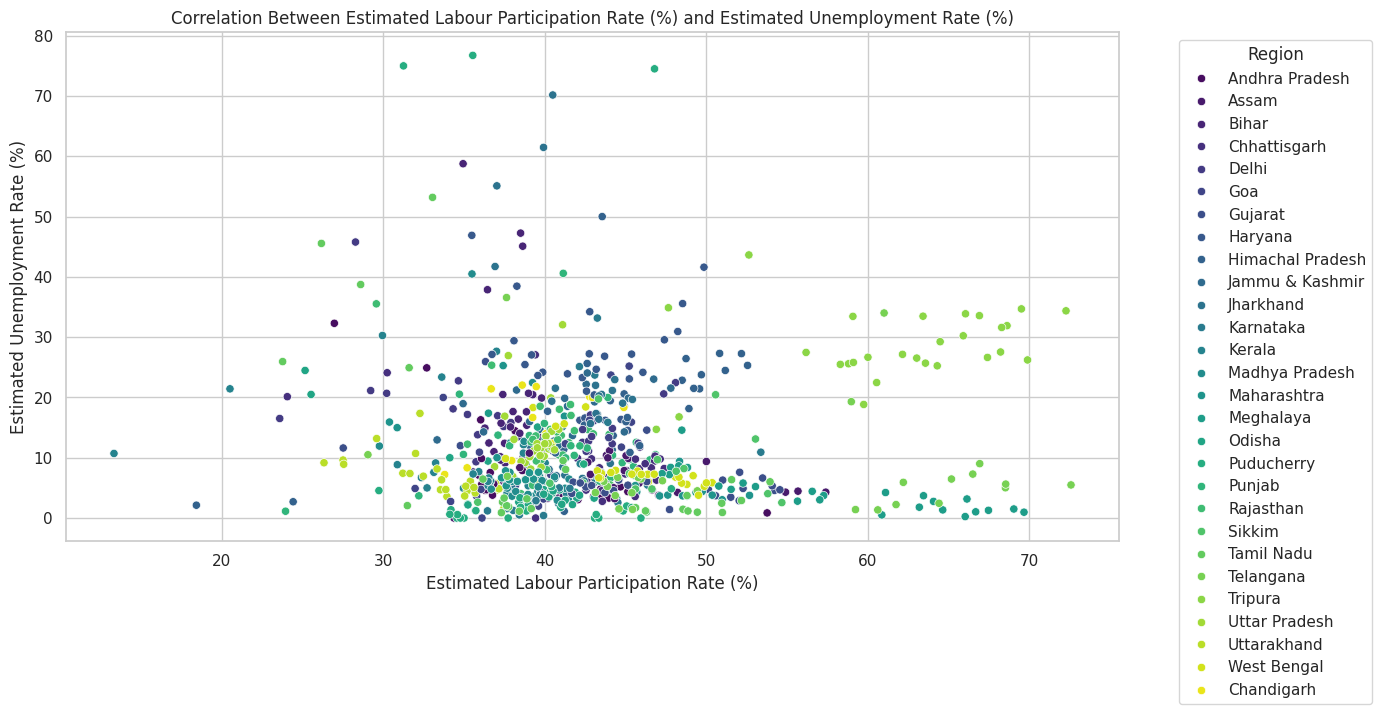

In [14]:
# Correlation between the unemployment rate and the labour participation rate
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data_cleaned, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', hue='Region', palette='viridis')
plt.title('Correlation Between Estimated Labour Participation Rate (%) and Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region')
plt.tight_layout()
plt.show()